# HW3: CIFAR10: Convolutional Neural Networks
In this homework assignment, we'll be focusing on all things CNN!

In [1]:
!python3 -VV

Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]


If you are running the notebook on Colab, you need to mount your drive. You can then add the directory where you python code is to the system path. The change in the system path is valid only for this session. If you are running the notebook in your local machine, the boolean variable `isColab` is going to be `False`, so anything inside the if statement will be ignored.

Package Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import tensorflow_datasets as tfds

Code Imports

In [4]:
%load_ext autoreload
%autoreload 2
import   assignment, conv_model, layers_keras, layers_manual
%aimport assignment, conv_model, layers_keras, layers_manual

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Pathing

## Data Preprocessing: CIFAR10

This code block will help you get familiar with the shape and type of the data returned by `get_data()`. `get_data` returns X0 (training images), X1 (training labels), Y0 (testing images), Y1 (testing labels), and some additional info about the dataset.

In [5]:
data = assignment.get_data()
X0, Y0, X1, Y1, D0, D1, D_info = data

2022-10-25 10:30:37.019454: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-25 10:30:37.019896: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-10-25 10:30:37.096915: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [6]:
D_info

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='/Users/yuchengma/tensorflow_datasets/cifar10/3.0.2',
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning mu

In [7]:
D_info.features['label']._int2str

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

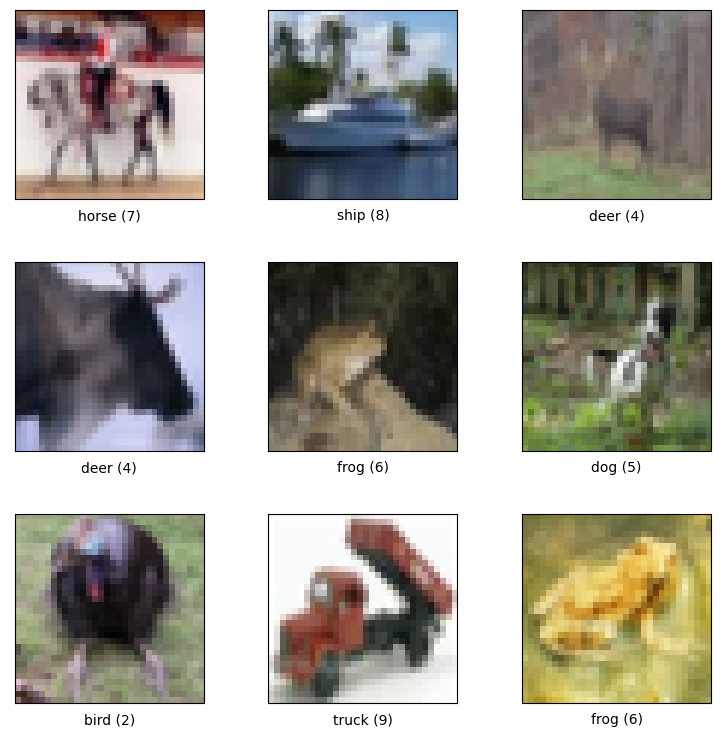

In [8]:
tfds.show_examples(D0, D_info);

### Augmenting train data

Once you've completed **[TODO 1]** in `get_default_CNN_model()`, you can run the cell below to visualize what your data augmentation pipeline is doing to the images. This will also hopefully help you determine which augmentations may help your model generalize and which will increase performance!
- First row shows original images but scaled
- Second row shows images after they have been preprocessed
- Third row shows your augmented images. 

NOTE: You do not need to finish TODO 2 before running this cell

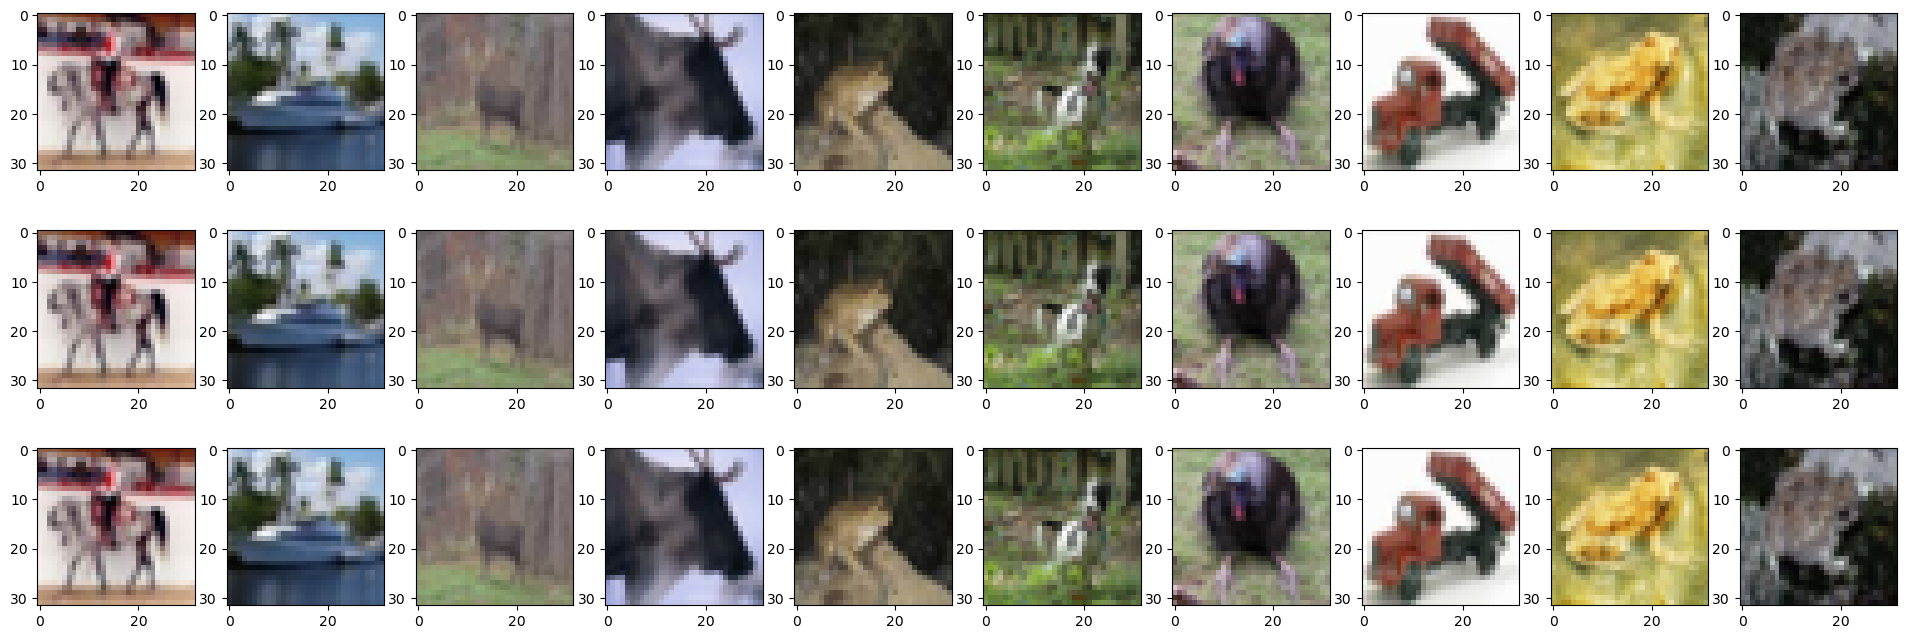

In [9]:
import conv_model

## You can use any list of 10 indices
sample_image_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sample_images = tf.cast(tf.gather(X0, sample_image_indices), tf.float32)
sample_labels = tf.gather(Y0, sample_image_indices)

fig, ax = plt.subplots(3, 10)
fig.set_size_inches(24, 8)

args = conv_model.get_default_CNN_model()

preprocessed_images = args.model.input_prep_fn(sample_images)
augmented_images = args.model.augment_fn(preprocessed_images)

for i in range(10):
    ax[0][i].imshow(sample_images[i]/255., cmap = "Greys")
    ax[1][i].imshow(preprocessed_images[i], cmap = "Greys")
    ax[2][i].imshow(augmented_images[i], cmap = "Greys")

## Train A Basic Keras Model

As part of step 2 from the handout, we just want you to construct a simple keras model to run prediction on your dataset!

Implement **[TODO 2]** in `get_default_CNN_model` to return a CNN model that can train above an accuracy of 55% (note that the requirement for 1470 is 62% and for 2470, is 65% though). Feel free to play around with the number of layers, hyperparameters for layers, epochs, batch size, and anything else you can think of. 

**Requirements:**
- Model must contain Conv2D, BatchNormalization, and Dropout layers. 
- These must be imported from the argument namespaces (already done by default).
- Task 1 will automatically use `tf.keras.layers` implementations.

In [26]:
import assignment 

## You can test with more epochs later
cnn_model = assignment.run_task(data, 1, epochs=10, batch_size=100)

Starting Model Training
Epoch 1/10
250/250 [==============================] - 12s 40ms/step - loss: 1.5620 - categorical_accuracy: 0.4478 - val_loss: 3.2085 - val_categorical_accuracy: 0.2110
Epoch 2/10
250/250 [==============================] - 11s 42ms/step - loss: 1.1577 - categorical_accuracy: 0.5856 - val_loss: 1.7223 - val_categorical_accuracy: 0.4301
Epoch 3/10
250/250 [==============================] - 11s 45ms/step - loss: 0.9535 - categorical_accuracy: 0.6637 - val_loss: 1.1700 - val_categorical_accuracy: 0.5942
Epoch 4/10
250/250 [==============================] - 11s 44ms/step - loss: 0.8109 - categorical_accuracy: 0.7113 - val_loss: 1.1126 - val_categorical_accuracy: 0.6220
Epoch 5/10
250/250 [==============================] - 14s 55ms/step - loss: 0.6848 - categorical_accuracy: 0.7604 - val_loss: 1.2574 - val_categorical_accuracy: 0.5945
Epoch 6/10
250/250 [==============================] - 14s 55ms/step - loss: 0.5700 - categorical_accuracy: 0.8013 - val_loss: 1.1819 - v

In [ ]:
cnn_model.summary()

## Make Your Own Layers
For steps 3, 4, and 5 from the handout, you'll need to implement the layers from scratch inside of `layers_keras.py`.
Feel free to refer to the official documentation for how these methods are supposed to function. 
More details are included in the layer block comments, and the init methods are already provided. 

**Requirements**:
- Implement Conv2D, BatchNormalization, and Dropout in `layers_keras.py`
- Cannot use existing layers as sub-components. 
- Cannot use `tf.nn.batch_normalization` or `tf.nn.dropout`. 
- CAN use `tf.nn.convolution`...
- Should utilize all non-commented-out arguments. 

### 2D Convolution

Use the below code block to confirm that your custom implementation of Conv2D runs without erroring. This does not guarantee that your forward pass calculations are correct. It serves only as a preliminary check.

In [11]:
import layers_keras

random_input = tf.random.uniform((1, 4, 4, 3), 0, 10, dtype=tf.float32)

seed = 8675309
tf.random.set_seed(seed)
conv_layer = layers_keras.Conv2D(1, 2, strides=2)
print("Output:", conv_layer(random_input, training=True))

tf.random.set_seed(seed)
conv_layer = tf.keras.layers.Conv2D(1, 2, strides=2)
print('Expected:', conv_layer(random_input, training=True))

Output: tf.Tensor(
[[[[-3.9427724]
   [ 1.0565095]]

  [[-2.7275045]
   [-5.8747783]]]], shape=(1, 2, 2, 1), dtype=float32)
Expected: tf.Tensor(
[[[[-3.9427724]
   [ 1.0565095]]

  [[-2.7275045]
   [-5.8747783]]]], shape=(1, 2, 2, 1), dtype=float32)


### Batch Normalization

Use the below code block to confirm that your custom implementation of Batch Normalization runs without erroring. This does not guarantee that your forward pass calculations are correct. It serves only as a preliminary check.

In [12]:
import layers_keras

random_input = tf.random.uniform((3,3), 0, 10, dtype=tf.float32)
print("Input:", random_input)

batch_norm = layers_keras.BatchNormalization()
print("Output:", batch_norm(random_input, training=True))

batch_norm = tf.keras.layers.BatchNormalization()
print('Expected:', batch_norm(random_input, training=True))

Input: tf.Tensor(
[[4.9200354  4.1594877  0.15996099]
 [0.17104864 3.8494146  4.5375834 ]
 [3.0904114  8.937246   6.2552547 ]], shape=(3, 3), dtype=float32)
Output: tf.Tensor(
[[ 1.1211213  -0.63942826 -1.3602844 ]
 [-1.3068337  -0.77256405  0.34549022]
 [ 0.18571234  1.4119925   1.0147942 ]], shape=(3, 3), dtype=float32)
Expected: tf.Tensor(
[[ 1.121121   -0.63942826 -1.3602844 ]
 [-1.3068335  -0.77256405  0.34549022]
 [ 0.18571234  1.4119925   1.0147942 ]], shape=(3, 3), dtype=float32)


### Dropout

Use the below code block to confirm that your custom implementation of Dropout runs without erroring. This does not guarantee that your forward pass or input gradients calculations are correct. It serves only as a preliminary check.

In [13]:
import layers_keras

random_input = tf.ones((2, 11))
print("Input:\n", random_input)

seed = 8675309
for mode_str, mode in zip(['Training', 'Testing'], [True, False]):
    print()
    for layer_str, layer in zip(['Output','Expected'], [layers_keras.Dropout, tf.keras.layers.Dropout]):
        tf.random.set_seed(seed)
        dropout_fn = layer(rate=0.2)
        print(f'{layer_str} {mode_str}:')
        print(dropout_fn(random_input, training=mode))

# Expected: Around rate% of the entries should be zeros in training mode.
#   Should also be normalized such that, on average, magnitude perserved.

Input:
 tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(2, 11), dtype=float32)

Output Training:
tf.Tensor(
[[1.25 1.25 1.25 1.25 1.25 1.25 0.   1.25 1.25 1.25 0.  ]
 [1.25 1.25 1.25 1.25 1.25 0.   1.25 0.   0.   1.25 1.25]], shape=(2, 11), dtype=float32)
Expected Training:
tf.Tensor(
[[1.25 1.25 1.25 1.25 1.25 1.25 0.   1.25 1.25 1.25 0.  ]
 [1.25 1.25 1.25 1.25 1.25 0.   1.25 0.   0.   1.25 1.25]], shape=(2, 11), dtype=float32)

Output Testing:
tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(2, 11), dtype=float32)
Expected Testing:
tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(2, 11), dtype=float32)


### Training your model
Now, let's see if your model works with the new components in place?

In [ ]:
import assignment 

# assignment.run_task(data, 2, 1, epochs=2)   ## Just manual conv
# assignment.run_task(data, 2, 2, epochs=2)   ## Just manual bnorm
# assignment.run_task(data, 2, 3, epochs=2)   ## Just manual dropout
assignment.run_task(data, 2, epochs=2)        ## Test all 3!

## Manual Convolution!

Now, go ahead and implement convolution manually! This should be done inside of the `layers_manual.py` file. It's very non-trivial to perform convolution differentiably without using `tf.nn.convolution`, so the manual convolution should only run during inference time. Below is a quick test to see if your convolution is consistent with the Keras layered version:

In [14]:
import layers_manual

random_input = tf.random.uniform((2, 4, 4, 3), 0, 10, dtype=tf.float32)

seed = 8675309
tf.random.set_seed(seed)
conv_layer = layers_manual.Conv2D(1, (2, 2), strides=2, padding='valid')
print("Output:", conv_layer(random_input, training=False))

tf.random.set_seed(seed)
conv_layer = tf.keras.layers.Conv2D(1, (2, 2), strides=2, padding='valid')
print('Expected:', conv_layer(random_input, training=False))

Output: tf.Tensor(
[[[[ 4.9855075 ]
   [ 0.72873694]]

  [[ 3.8827431 ]
   [-1.147548  ]]]


 [[[-3.0885878 ]
   [-1.8373235 ]]

  [[-5.2728376 ]
   [ 0.12673497]]]], shape=(2, 2, 2, 1), dtype=float32)
Expected: tf.Tensor(
[[[[ 4.985508  ]
   [ 0.7287366 ]]

  [[ 3.882744  ]
   [-1.1475489 ]]]


 [[[-3.088588  ]
   [-1.8373228 ]]

  [[-5.272838  ]
   [ 0.12673458]]]], shape=(2, 2, 2, 1), dtype=float32)


Inside the loop, this will happen at the end of every epoch because a validation set is being evaluated alongside your training set. The following will test it out for you! Don't worry if your categorical accuracy looks low here. As long as everything works without erroring, feel free to move on and test the whole model together.

In [ ]:
import assignment 

assignment.run_task(data, 3, epochs=5)

## Wrapping Up

Make sure your model runs and trains up to standards! When you find a model configuration that you like, feel free to update your `get_default_CNN_model` function so that the autograder can use it with your arguments. If your model takes too long to train (> 10 mins), the autograder may time out, so take consideration of that. 

In [ ]:
## Run at least once
from types import SimpleNamespace
from conv_model import CustomSequential

For convenience, you can copy your code here for quick testing!

Make sure to put it back into your `conv_model.py` file for the autograder!

In [ ]:
def get_default_CNN_model(
    conv_ns=tf.keras.layers,
    norm_ns=tf.keras.layers,
    drop_ns=tf.keras.layers,
    man_conv_ns=tf.keras.layers,
):
    return None

In [ ]:
conv_ns = tf.keras.layers
norm_ns = tf.keras.layers
drop_ns = tf.keras.layers
man_conv_ns = tf.keras.layers

args = get_default_CNN_model(
    conv_ns=conv_ns, 
    norm_ns=norm_ns, 
    drop_ns=drop_ns, 
    man_conv_ns=man_conv_ns
)

history = args.model.fit(
    X0,
    Y0,
    epochs=args.epochs,
    batch_size=args.batch_size,
    validation_data=(X1, Y1),
)

### Sanity Checks

In case you need them!

In [ ]:
P1 = np.argmax(cnn_model.predict(X1), -1)
confusion_mtx = tf.math.confusion_matrix(P1, Y1)

P0 = np.argmax(cnn_model.predict(X0), -1)
confusion_mtx = tf.math.confusion_matrix(P0, Y0)
plt.figure(figsize=(12, 9))
plt.imshow(confusion_mtx, cmap='hot', interpolation='nearest')

In [ ]:
P1 = np.argmax(cnn_model.predict(X1), -1)
confusion_mtx = tf.math.confusion_matrix(P1, Y1)
plt.figure(figsize=(12, 9))
plt.imshow(confusion_mtx, cmap='hot', interpolation='nearest')

In [ ]:
fig, ax = plt.subplots(2, 10)
fig.set_size_inches(24, 8)

pred0 = cnn_model.predict(X0[:10])
pred1 = cnn_model.predict(X1[:10])

def p2l(pred):
    return D_info.features['label']._int2str[pred]

for i in range(10):
    ax[0][i].imshow(X0[i], cmap = "Greys")
    ax[1][i].imshow(X1[i], cmap = "Greys")
    ax[1][i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax[0][i].set_xlabel(f"Pred {p2l(np.argmax(pred0[i], -1))} | {p2l(Y0[i])}")    
    ax[1][i].set_xlabel(f"Pred {p2l(np.argmax(pred1[i], -1))} | {p2l(Y1[i])}")